In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [0]:
df1=pd.read_csv('http://iali.in/datasets/loan_status_train.csv')

In [3]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df1.shape

(614, 13)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [0]:
for item in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
  df1[item]=df1[item].fillna(df1[item].mode()[0])

In [0]:
for item in ['Loan_Amount_Term','LoanAmount']:
  df1[item]=df1[item].fillna(df1[item].median())

In [0]:
df1['Gender']=df1['Gender'].map({'Male':0,'Female':1})
df1['Married']=df1['Married'].map({'No':0,'Yes':1})
df1['Education']=df1['Education'].map({'Not Graduate':0,'Graduate':1})
df1['Self_Employed']=df1['Self_Employed'].map({'No':0,'Yes':1})
df1['Property_Area']=df1['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
df1['Loan_Status']=df1['Loan_Status'].map({'N':0,'Y':1})
df1['Dependents']=df1['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [0]:
df1=df1.drop('Loan_ID',axis=1)

In [0]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df1,train_size=0.7,test_size=0.3,random_state=1)

In [0]:
y_train=df_train.pop('Loan_Status')
X_train=df_train

In [0]:
from sklearn.preprocessing import MinMaxScaler
col=X_train.columns
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=col)

In [14]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
X_train_pred=lr.predict(X_train)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix1=confusion_matrix(y_train,X_train_pred)

In [18]:
sensi=confusion_matrix1[1][1]/(confusion_matrix1[1][0]+ confusion_matrix1[1][1])
accuracy=(confusion_matrix1[0][0]+confusion_matrix1[1][1])/(confusion_matrix1[0][0]+ confusion_matrix1[0][1]+confusion_matrix1[1][0]+confusion_matrix1[1][1])
print('Sensitivity-',sensi)
print('Accuracy',accuracy)

Sensitivity- 0.9832214765100671
Accuracy 0.8181818181818182


In [0]:
y_test=df_test.pop('Loan_Status')
X_test=df_test

In [0]:
col=X_test.columns
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=col)

In [0]:
X_test_pred= lr.predict(X_test)

In [0]:
confusion_matrix1=confusion_matrix(y_test,X_test_pred)

In [23]:
sensi=confusion_matrix1[1][1]/(confusion_matrix1[1][0]+ confusion_matrix1[1][1])
accuracy=(confusion_matrix1[0][0]+confusion_matrix1[1][1])/(confusion_matrix1[0][0]+ confusion_matrix1[0][1]+confusion_matrix1[1][0]+confusion_matrix1[1][1])
print('Sensitivity-',sensi)
print('Accuracy',accuracy)

Sensitivity- 0.9838709677419355
Accuracy 0.7891891891891892


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print('Accuracy- K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy- K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy- K-NN classifier on training set: 0.84
Accuracy- K-NN classifier on test set: 0.74


In [25]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.79


In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.80
Accuracy of GNB classifier on test set: 0.79


In [0]:
df2= pd.read_csv('http://iali.in/datasets/cereal.csv')

In [28]:
df2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [29]:
df2.shape

(77, 16)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [31]:
df2['type'].unique()

array(['C', 'H'], dtype=object)

In [0]:
df2['mfr']=df2['mfr'].map({'N':0,'Q':1,'K':2,'R':3,'G':4,'P':5,'A':6})
df2['type']=df2['type'].map({'C':0,'H':1})

In [0]:
df2=df2.drop('name',axis=1)

In [0]:
df_train,df_test=train_test_split(df2,train_size=0.8,test_size=0.2,random_state=1)

In [0]:
y_train=df_train.pop('rating')
X_train=df_train

In [0]:
col=X_train.columns
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=col)

In [37]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
lr_1.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.420e+15
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:58:52   Log-Likelihood:                 835.69
No. Observations:                  61   AIC:                            -1641.
Df Residuals:                      46   BIC:                            -1610.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.5604   3.66e-07   1.44e+08      0.000      52.560      52.560
mfr         3.304e-07   1.78e-07      1.859      0.069   -2.73e-08    6.88e-07
type        1.091e-08   3.63e-07      0.030      0.976    -7.2e-07    7.42e-07
calories     -24.4997   9.72e-07  -2.52e+07      0.000     -24.500     -24.500
protein       16.3659   3.14e-07   5.21e+07      0.000      16.366      16.366
fat           -8.4570   4.23e-07     -2e+07      0.000      -8.457      -8.457
sodium       -15.8029   2.12e-07  -7.45e+07      0.000     -15.803     -15.803
fiber         48.2087   7.89e-07   6.11e+07      0.000      48.209      48.209
carbo         18.5717   7.06e-07   2.63e+07      0.000      18.572      18.572
sugars       -10.8734   6.09e-07  -1.78e+07      0.000     -10.873     -10.873
potass       -11.2518   6.27e-07   -1.8e+07      0.000     -11.252     -11.252
vitamins      -5.1212   2.38e-07  -2.15e+07      0.000      -5.121      -5.121
shelf      -1.254e-07   1.19e-07     -1.057      0.296   -3.64e-07    1.13e-07
weight     -1.991e-07   6.18e-07     -0.322      0.749   -1.44e-06    1.05e-06
cups        2.448e-07   2.78e-07      0.882      0.382   -3.14e-07    8.03e-07
==============================================================================
Omnibus:                        8.265   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                2.742
Skew:                          -0.008   Prob(JB):                        0.254
Kurtosis:                       1.961   Cond. No.                         66.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,calories,112.62
12,weight,71.11
7,carbo,50.84
8,sugars,34.30
9,potass,27.89
6,fiber,16.62
13,cups,10.88
5,sodium,10.18
0,mfr,7.51
3,protein,6.34


In [39]:
from sklearn.feature_selection import RFE
rfe= RFE(LinearRegression(),5)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [40]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('mfr', False, 7),
 ('type', False, 10),
 ('calories', True, 1),
 ('protein', True, 1),
 ('fat', False, 4),
 ('sodium', True, 1),
 ('fiber', True, 1),
 ('carbo', True, 1),
 ('sugars', False, 3),
 ('potass', False, 2),
 ('vitamins', False, 5),
 ('shelf', False, 9),
 ('weight', False, 8),
 ('cups', False, 6)]

In [0]:
col = X_train.columns[rfe.support_]

In [42]:
X_train_lm = sm.add_constant(X_train[col])

lr_1 = sm.OLS(list(y_train), X_train_lm).fit()
lr_1.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     763.8
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           1.74e-49
Time:                        13:58:53   Log-Likelihood:                -120.10
No. Observations:                  61   AIC:                             252.2
Df Residuals:                      55   BIC:                             264.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2604      0.975     48.452      0.000      45.306      49.215
calories     -48.7610      1.437    -33.922      0.000     -51.642     -45.880
protein       19.2995      1.326     14.551      0.000      16.642      21.958
sodium       -16.2707      0.984    -16.533      0.000     -18.243     -14.298
fiber         36.2623      1.818     19.945      0.000      32.619      39.906
carbo         31.8595      1.176     27.090      0.000      29.503      34.216
==============================================================================
Omnibus:                        2.759   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.993
Skew:                          -0.240   Prob(JB):                        0.369
Kurtosis:                       3.744   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.42
4,fiber,1.74
2,protein,1.50
5,carbo,1.34
1,calories,1.33
3,sodium,1.28


In [0]:
y_test=df_test.pop('rating')
X_test=df_test

In [0]:
col=X_test.columns
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=col)
X_test1=X_test[['fiber','protein','carbo','calories','sodium']]

In [46]:
X_test_pred= lr_1.predict(sm.add_constant(X_test1))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,X_test_pred)

-11.005365392524114

In [48]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003216,0.001631,0.001319,0.000459,0.0001,{'alpha': 0.0001},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.302767e-08,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.899304e-09
1,0.001867,0.000067,0.000980,0.000017,0.001,{'alpha': 0.001},0.999989,0.999974,0.999983,0.999995,0.999994,0.999987,7.951293e-06,2,0.999996,0.999994,0.999996,0.999996,0.999996,0.999996,7.442707e-07
2,0.001876,0.000075,0.000988,0.000020,0.01,{'alpha': 0.01},0.999259,0.998184,0.998744,0.999647,0.999531,0.999073,5.425256e-04,3,0.999722,0.999614,0.999738,0.999709,0.999713,0.999699,4.396154e-05
3,0.002646,0.000475,0.001262,0.000277,0.05,{'alpha': 0.05},0.993687,0.984610,0.988139,0.996393,0.995245,0.991615,4.504553e-03,4,0.997274,0.996700,0.997399,0.997007,0.996976,0.997071,2.447993e-04
4,0.001952,0.000042,0.001025,0.000010,0.1,{'alpha': 0.1},0.988338,0.972315,0.977636,0.993230,0.990279,0.984360,7.997964e-03,5,0.994508,0.993954,0.994864,0.994074,0.993748,0.994230,4.030851e-04


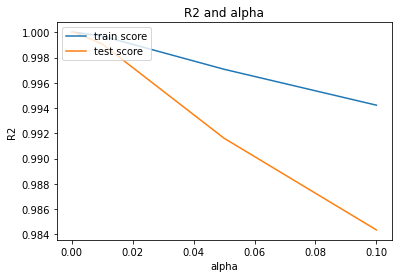

In [50]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [51]:
ridge = Ridge(alpha=0.01)

ridge.fit(X_train, y_train)
y_train_pred= ridge.predict(X_train)
print('Training set:',r2_score(y_train,y_train_pred))
y_test_pred=ridge.predict(X_test)
print('Test set:',r2_score(y_test,y_test_pred))

Training set: 0.9998140548795921
Test set: 0.9961061190887918


In [52]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003404,0.002222,0.001309,0.000552,0.0001,{'alpha': 0.0001},1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.788681e-08,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.481378e-08
1,0.002258,0.000376,0.001020,0.000019,0.001,{'alpha': 0.001},0.999981,0.999979,0.999978,0.999993,0.999985,0.999983,5.504959e-06,2,0.999994,0.999992,0.999994,0.999994,0.999993,0.999993,7.827785e-07
2,0.002057,0.000029,0.001010,0.000014,0.01,{'alpha': 0.01},0.997553,0.997307,0.997070,0.999099,0.998151,0.997836,7.267337e-04,3,0.999180,0.999034,0.999261,0.999194,0.999076,0.999149,8.261252e-05
3,0.002028,0.000131,0.001073,0.000096,0.05,{'alpha': 0.05},0.976903,0.973425,0.973876,0.994810,0.980303,0.979863,7.869746e-03,4,0.992727,0.991229,0.992783,0.990318,0.991279,0.991667,9.520716e-04
4,0.001993,0.000059,0.001021,0.000019,0.1,{'alpha': 0.1},0.968418,0.961988,0.967284,0.993016,0.968742,0.971890,1.084017e-02,5,0.989424,0.987087,0.989502,0.986956,0.987256,0.988045,1.162017e-03


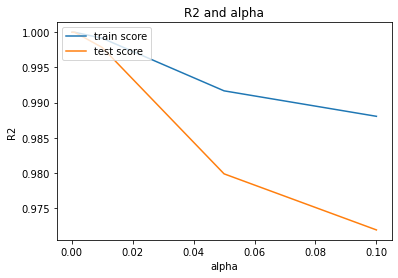

In [54]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
lasso = Lasso(alpha=0.001)

lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
print('Training set:',r2_score(y_train,y_train_pred))
y_test_pred=lasso.predict(X_test)
print('Test set:',r2_score(y_test,y_test_pred))

Training set: 0.9999939206409114
Test set: 0.9999158163654401
